In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
# Plotly is used to get details when hovered
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [12]:
attrition = pd.read_csv(r"WA_Fn-UseC_-HR-Employee-Attrition.csv")
attrition.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [13]:

# Looking for NaN
display(attrition.isnull().any())


Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

Text(0.5, 1.0, 'Attrition Breakdown')

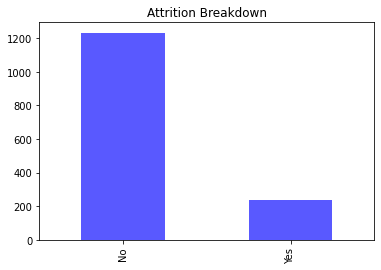

In [14]:
attrition.Attrition.value_counts().plot(kind='bar', color="blue", alpha=.65)
plt.title("Attrition Breakdown")

Text(0, 0.5, 'Frequency of Attrition')

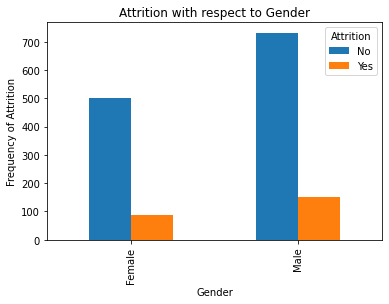

In [15]:

#Breakdown of Attribution data with respect to Gender
pd.crosstab(attrition.Gender,attrition.Attrition).plot(kind='bar')
plt.title('Attrition with respect to Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Attrition')
#Based on the above chart, Gender seems to have some effect on Attrition. It seems like more male employees have been attritioned than the female employees.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

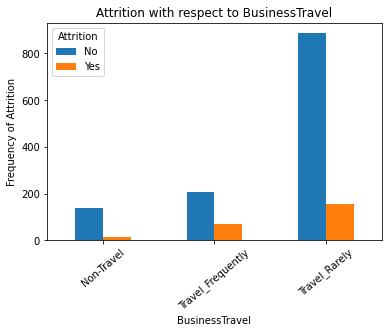

In [16]:
pd.crosstab(attrition.BusinessTravel,attrition.Attrition).plot(kind='bar')
plt.title('Attrition with respect to BusinessTravel')
plt.xlabel('BusinessTravel')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

In [0]:
Observation
The attrition is less in all the cases irrespective of the bussiness travel.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

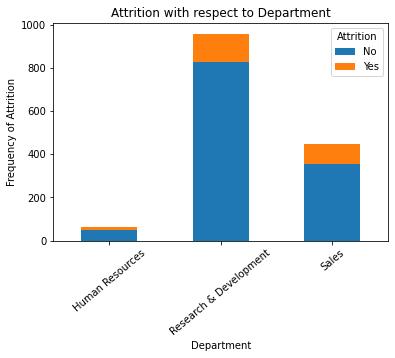

In [17]:
pd.crosstab(attrition.Department,attrition.Attrition).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

In [0]:
Observation-
OBSERVATION :
Department attribute has a prominent effect on the target variable and will be useful for modelling and prediction. R&D department has the highest record for attrition,on the other hand it also has the highest number of employees when compared to HR and Sales departments.

Text(0, 0.5, 'Frequency of Attrition')

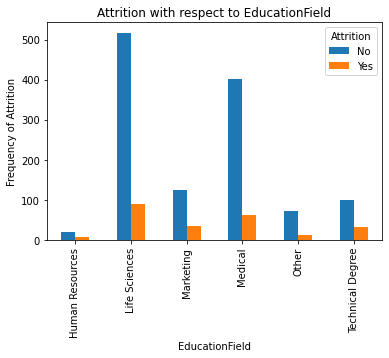

In [18]:
pd.crosstab(attrition['EducationField'],attrition['Attrition']).plot(kind='bar',stacked=False)
plt.title('Attrition with respect to EducationField')
plt.xlabel('EducationField')
plt.ylabel('Frequency of Attrition')

In [0]:
OBSERVATION :
LifeSciences and Medical fields have the highest number of employees and attrition rate as well. The percentage of employees who have attritioned against those who have been retained seems to be approximately same in all the education fields.

Text(0, 0.5, 'Frequency of Attrition')

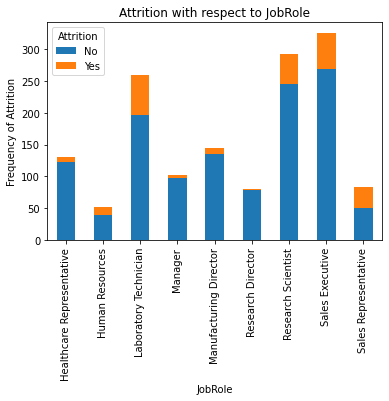

In [19]:
pd.crosstab(attrition['JobRole'],attrition['Attrition']).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to JobRole')
plt.xlabel('JobRole')
plt.ylabel('Frequency of Attrition')

In [0]:
OBSERVATION :
Job role seems to have an impact on the attrition rate of employees based on the above plot and we see less attrition in the case of Research Director

Text(0, 0.5, 'Frequency of Attrition')

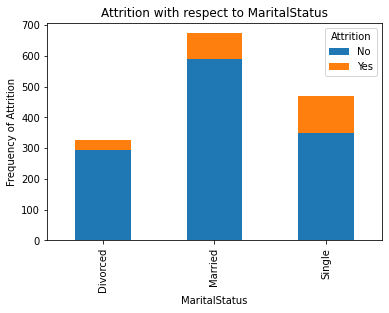

In [20]:
pd.crosstab(attrition['MaritalStatus'],attrition['Attrition']).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Frequency of Attrition')

In [0]:
OBSERVATION :
There is variation in the data set based on the marital status of employees. Among married and divorced people there is lower rate of attrition when compared to employees who are single.

In [21]:
3. #Implementing Machine Learning Models

oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(x_train_encode,y_train_encode)

NameError: ignored

In [0]:
attrition_tar= attrition.drop(['Attrition'], axis=1)
y=attrition['Attrition']
# Import the train_test_split method
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(attrition_tar, 
                                                         y, 
                                                         train_size= 0.80,
                                                         random_state=0);

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1176, 34)
(1176,)
(294, 34)
(294,)


In [26]:
type(y_train)

pandas.core.series.Series

In [0]:
def encoding(data):
    # Empty list to store columns with categorical data
    categorical = []
    for col, value in data.iteritems():
        if value.dtype == 'object':
            categorical.append(col)

    # Store the numerical columns in a list numerical
    numerical = data.columns.difference(categorical)
    attrition_cat = data[categorical]
    attrition_cat = pd.get_dummies(attrition_cat)
    # Store the numerical features to a dataframe attrition_num
    attrition_num = data[numerical]
    # Concat the two dataframes together columnwise
    attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)
    print(attrition_final.columns)
    return attrition_final




In [28]:
x_train_encode=encoding(x_train)
x_train_encode.shape

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

(1176, 55)

In [29]:
x_test_encode=encoding(x_test)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

In [0]:
def target_encode(data):
    # Define a dictionary for the target mapping
    target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
    target = data.apply(lambda x: target_map[x])
    return target



In [0]:
y_train_encode=target_encode(y_train)
y_test_encode=target_encode(y_test)

In [0]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(x_train_encode,y_train_encode)

In [0]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [34]:
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [35]:
rf_predictions = rf.predict(x_test_encode)
print("Predictions finished")

Predictions finished


In [36]:
print("Accuracy score: {}".format(accuracy_score(y_test_encode, rf_predictions)))
print("="*80)
print(classification_report(y_test_encode, rf_predictions))

Accuracy score: 0.8537414965986394
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       245
           1       0.57      0.49      0.53        49

    accuracy                           0.85       294
   macro avg       0.74      0.71      0.72       294
weighted avg       0.85      0.85      0.85       294



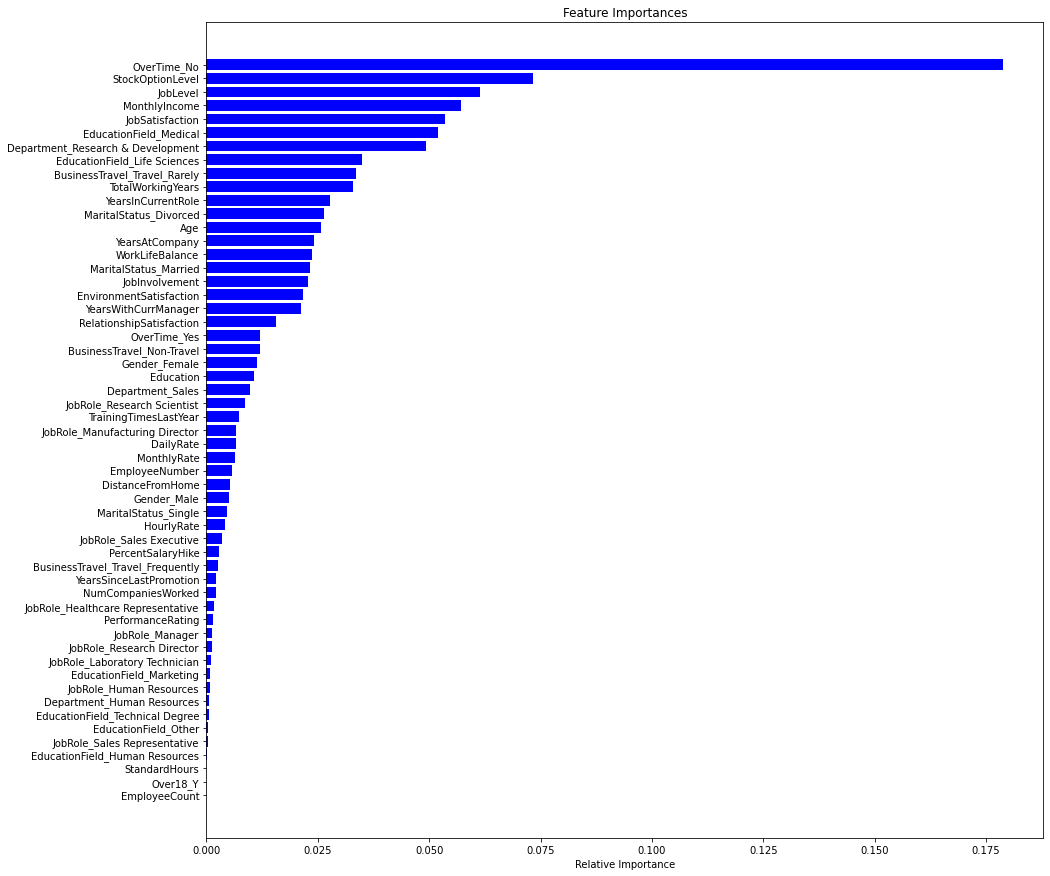

In [37]:
4.#Make sure to provide import features for at least one of the models
features = x_train_encode.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [38]:
#Descision Tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [39]:
dt_predictions = dt.predict(x_test_encode)
print("Predictions finished")

Predictions finished


In [40]:
print("Accuracy score: {}".format(accuracy_score(y_test_encode, dt_predictions)))
print("="*80)
print(classification_report(y_test_encode, dt_predictions))

Accuracy score: 0.7653061224489796
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       245
           1       0.29      0.29      0.29        49

    accuracy                           0.77       294
   macro avg       0.57      0.57      0.57       294
weighted avg       0.76      0.77      0.76       294



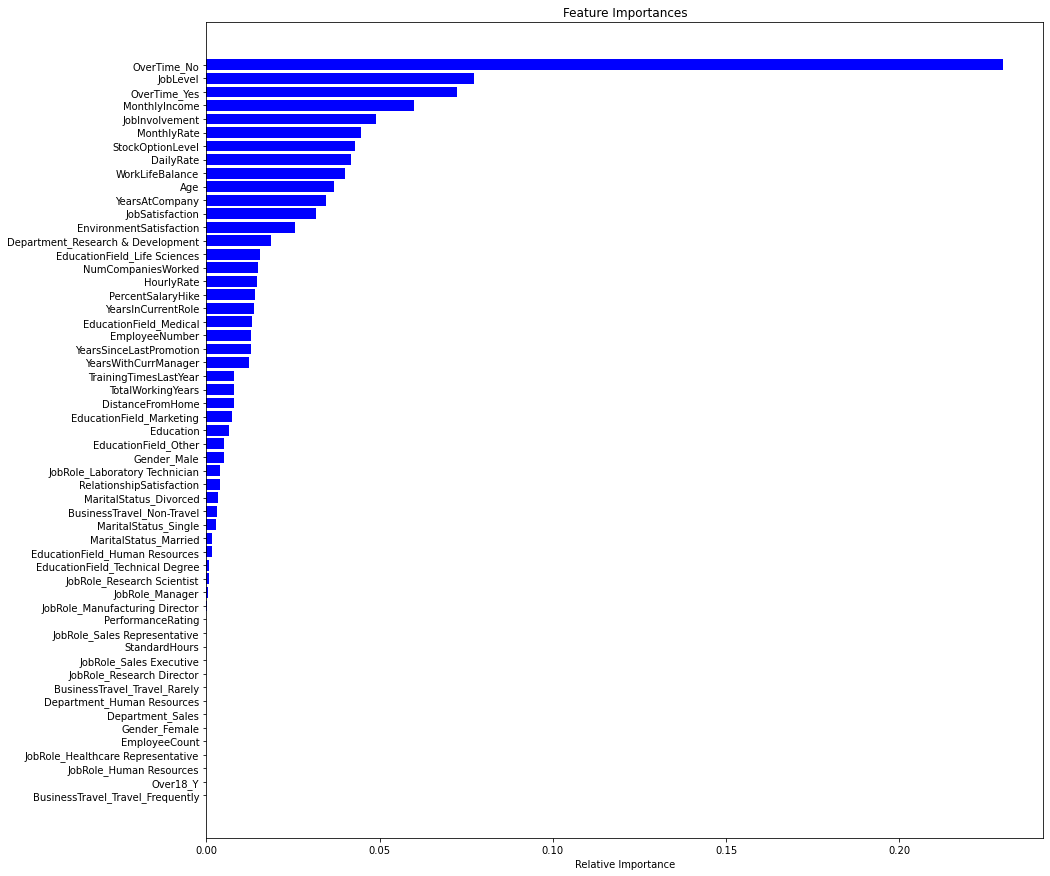

In [41]:
features = x_train_encode.columns.values
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
#Gradient Boosted Classifier
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [43]:


gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(x_test_encode)
print("Predictions have finished")

Predictions have finished


In [44]:
print(accuracy_score(y_test_encode, gb_predictions))
print("="*80)
print(classification_report(y_test_encode, gb_predictions))

0.8605442176870748
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       245
           1       0.64      0.37      0.47        49

    accuracy                           0.86       294
   macro avg       0.76      0.66      0.69       294
weighted avg       0.84      0.86      0.84       294



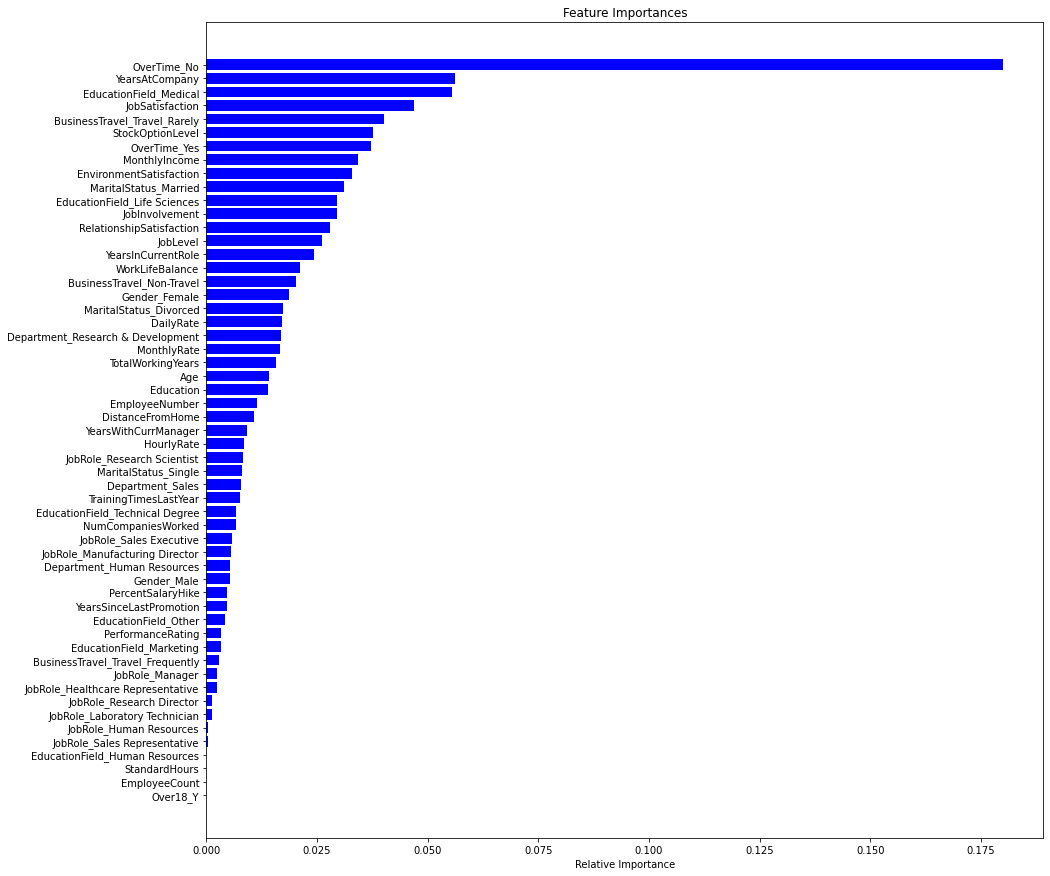

In [45]:
features = x_train_encode.columns.values
importances = gb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
Models_AccuracyPrecisionF1 score

In [0]:
Random Forest_85.37__0.85__0.85
Decision Tree__75.85__ 0.77__0.76
Gradient Boosting__86.05__0.84__0.86